In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# REVIEW

In [11]:
review = pd.read_csv('predicted_review.csv')
fake = review[review['True(1)/Deceptive(0)']=='Deceptive']
true = review[review['True(1)/Deceptive(0)']=='True']

In [127]:
len(review)

1978502

In [126]:
review.groupby('True(1)/Deceptive(0)').count()['Review']

True(1)/Deceptive(0)
Deceptive     423516
True         1554986
Name: Review, dtype: int64

In [112]:
fake.groupby('True(1)/Deceptive(0)').count()['Review']

True(1)/Deceptive(0)
Deceptive    423516
Name: Review, dtype: int64

In [125]:
fake.groupby(['True(1)/Deceptive(0)','Stars']).count()['Review']

True(1)/Deceptive(0)  Stars
Deceptive             1.0       34294
                      2.0       22742
                      3.0       32638
                      4.0       94390
                      5.0      239452
Name: Review, dtype: int64

In [21]:
true['text length'] = true['Review'].apply(len)

/Users/zhiweizhang/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
fake['text length'] = fake['Review'].apply(len)

/Users/zhiweizhang/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# Compare restaurant ratings difference after filtering out fake reviews

In [111]:
a = review.groupby('business_id').sum()['Stars']
b = true.groupby('business_id').sum()['Stars']

review_count = review.groupby('business_id').count()['Review']
review_count2 = true.groupby('business_id').count()['Review']

rating_df = pd.DataFrame(a/review_count,columns = ['original rating'])
# rating_df['new rating'] = list(b/review_count2)
rating_df2= pd.DataFrame(b/review_count,columns = ['new rating'])

In [62]:
result = rating_df.join(rating_df2)

In [95]:
print(result.head(10))
sum((result['original rating'] > result['new rating']))

                        original rating  new rating
business_id                                        
--9e1ONYQuAa-CB_Rrw7Tw         4.087113    2.850972
--FBCX-N37CMYDfs790Bnw         3.830000    2.590000
--GM_ORV2cYS-h38DSaCLw         4.142857    3.428571
--I7YYLada0tSLkORTHb5Q         3.442623    2.622951
--KCl2FvVQpvjzmZSPyviA         2.916667    1.416667
--Ni3oJ4VOqfOEu7Sj2Vzg         2.000000    0.833333
--S62v0QgkqQaVUhFnNHrw         2.000000    1.772727
--U98MNlDym2cLn36BBPgQ         2.750000    2.500000
--cZ6Hhc9F7VkKXxHMVZSQ         3.913333    3.303333
--ujyvoQlwVoBgMYtADiLA         3.696970    2.984848


19454

# Histograms of text length distributions for each star rating True vs Fake review

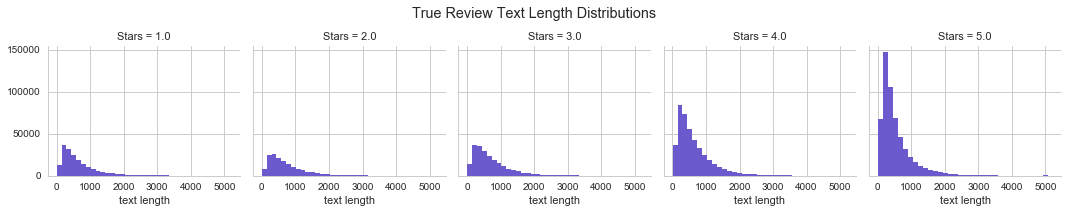

In [41]:
sns.set(style="whitegrid", color_codes=True)
sns.set_context(font_scale=8)
g = sns.FacetGrid(true, col='Stars')
g.map(plt.hist, 'text length', bins=35,color = 'slateblue')

sns.plt.subplots_adjust(top=0.8)
sns.plt.suptitle('True Review Text Length Distributions')
plt.show()

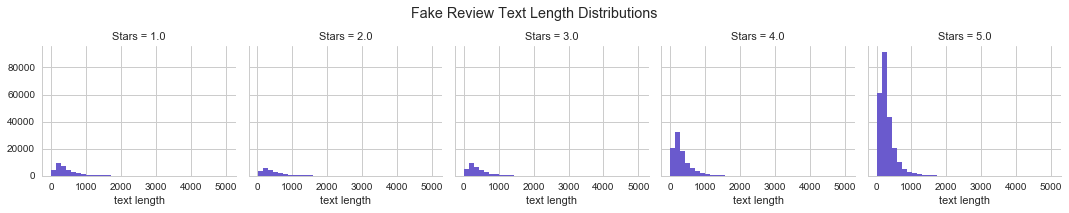

In [46]:
sns.set(style="whitegrid", color_codes=True)
g = sns.FacetGrid(fake, col='Stars',)
g.map(plt.hist, 'text length', bins=35,color = 'slateblue')

sns.plt.subplots_adjust(top=0.8)
sns.plt.suptitle('Fake Review Text Length Distributions')
plt.show()

In [ ]:
# review rating overtime:

# fake/true reivew stars distribution comparison

In [13]:
count = fake.groupby('Stars').count()
count2 = true.groupby('Stars').count()

/Users/zhiweizhang/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:518: UserWarning: You have mixed positional and keyword arguments, some input will be discarded.
  warnings.warn("You have mixed positional and keyword "


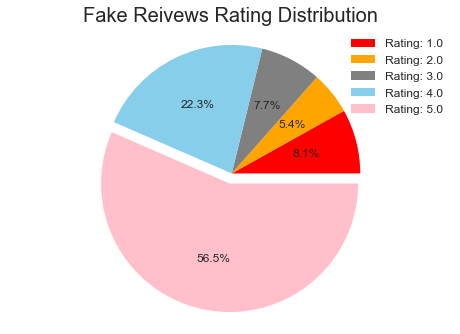

In [16]:
from matplotlib.gridspec import GridSpec

names='Rating: 1.0', 'Rating: 2.0', 'Rating: 3.0', 'Rating: 4.0','Rating: 5.0'
size=[count.iloc[0]['Review'],count.iloc[1]['Review'],count.iloc[2]['Review'],count.iloc[3]['Review'],count.iloc[4]['Review']]
size2=[count2.iloc[0]['Review'],count2.iloc[1]['Review'],count2.iloc[2]['Review'],count2.iloc[3]['Review'],count2.iloc[4]['Review']]

pie = plt.pie(size,autopct='%1.1f%%',explode=(0, 0, 0, 0, 0.08), colors=['red','orange','grey','skyblue','pink'])
plt.title('Fake Reivews Rating Distribution',fontsize = 20)
plt.axis('equal')
plt.legend(pie[0], labels = names,fontsize = 12)

plt.show()

/Users/zhiweizhang/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:518: UserWarning: You have mixed positional and keyword arguments, some input will be discarded.
  warnings.warn("You have mixed positional and keyword "


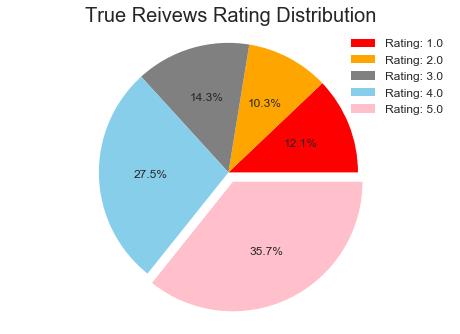

In [20]:
pie = plt.pie(size2, autopct='%1.1f%%',explode=(0, 0, 0, 0, 0.08), colors=['red','orange','grey','skyblue','pink'])
plt.title('True Reivews Rating Distribution',fontsize = 20)
plt.axis('equal')
plt.legend(pie[0], labels = names, fontsize = 12)

plt.show()

# BUSINESS

In [109]:
business = pd.read_csv('business_data.csv')


In [110]:
business.head(100)

,business_id,categories,city,is_open,latitude,longitude,name,postal_code,pricerange,review_count,stars,state
0,fl2TPNWrchkCbNEg0utjvw,"['Diners', 'Breakfast & Brunch', 'Burgers', 'A...",Urbana,1,40.133197,-88.198577,Steak 'n Shake,61802.0,1,14,2.0,IL
1,MqhxKfI7oMjUTMqH2gnhyg,"['Fast Food', 'Restaurants', 'Burgers']",Champaign,1,40.137569,-88.243052,McDonald's,61820.0,1,10,1.5,IL
2,89-bwvH5mWWOOb00VTUyFQ,"['Burgers', 'Sports Bars', 'American (Traditio...",Savoy,1,40.069599,-88.249054,Applebee's,61874.0,2,24,2.5,IL
3,UmZdQID7QJoyg2R92mK3HA,"['Thai', 'Restaurants', 'Sushi Bars']",Urbana,1,40.112708,-88.209446,Siam Terrace,61801.0,2,161,4.0,IL
4,OC5BqhpPhnJJr7IXLsXIbg,"['Bars', 'Nightlife', 'Restaurants', 'American...",Champaign,1,40.110251,-88.233520,Papa D's Bar & Grill,61820.0,2,4,3.0,IL
5,62Ibju8UmUZtPIBLDS_nUw,"['Fish & Chips', 'Restaurants', 'American (Tra...",Champaign,1,40.122140,-88.243561,Tasty Fish Chicken & Grill,61820.0,2,4,4.0,IL
6,uMHk2kudlAN94fFVNdYhxw,"['Restaurants', 'Seafood', 'Fast Food']",Champaign,1,40.129068,-88.258307,Long John Silver's,61820.0,0,3,2.5,IL
7,wCoAzScVWpL9bsDsyf1EIQ,"['Fast Food', 'Burgers', 'Restaurants']",Urbana,1,40.118229,-88.204410,McDonald's,61803.0,1,6,2.0,IL
8,VHskIuH12SlaguUA83XmYA,"['Restaurants', 'Food', 'Fast Food']",Urbana,1,40.097442,-88.190285,Burger King,61802.0,1,5,2.0,IL
9,X57f6FWZiwI1wOidPPhOrQ,"['Restaurants', 'Mexican']",Champaign,1,40.129886,-88.258482,Dos Reales,61820.0,1,170,4.0,IL


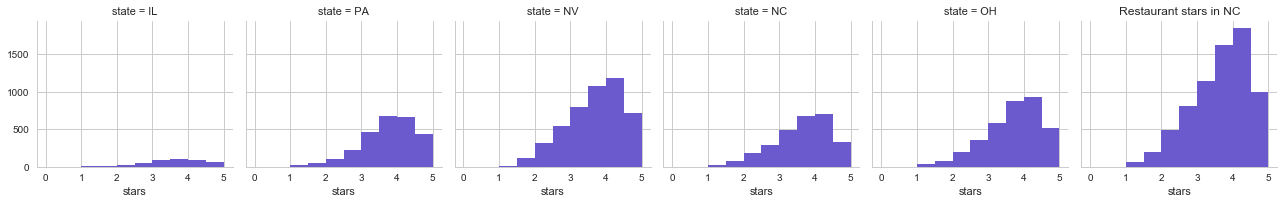

In [85]:
sns.set(style="whitegrid", color_codes=True)
g = sns.FacetGrid(df, col='state')
bins = np.linspace(0, 5, 11)
g.map(plt.hist,'stars',bins = bins,color = 'slateblue')

plt.title('Restaurant stars in NC')
plt.show()

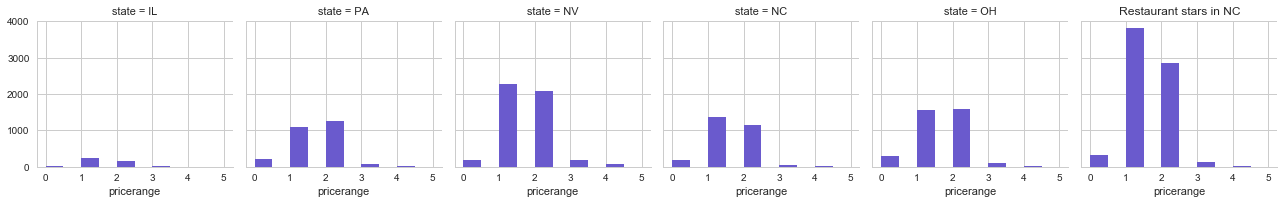

In [103]:
sns.set(style="whitegrid", color_codes=True)
g = sns.FacetGrid(business, col='state')
bins = np.linspace(0, 5, 11)
g.map(plt.hist,'pricerange',bins = bins,color = 'slateblue')

plt.title('Restaurant stars in NC')
plt.show()

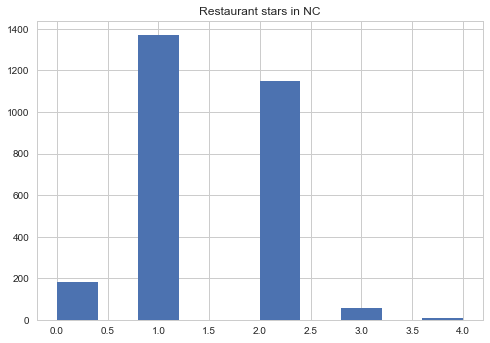

In [108]:
a = plt.hist(business[business['state'] =='NC']['pricerange'])
plt.title('Restaurant stars in NC')
plt.show()